In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import scipy.stats as stats

E:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#get covid test result
df_covid=pd.read_table('../NSinternship/covid19_result_0806.by_eid')

In [3]:
#get all eids with covid positive test
eid_positive=list(df_covid['eid'][df_covid['final_result']==1])

In [4]:
data = pd.read_csv("../NSinternship/Covid_information_20-08-18.csv")

### Data Field 31: Sex

In [5]:
sex = data[['eid','31-0.0']]
sex = sex.rename(columns = {'31-0.0': 'Sex'}, inplace = False)
sex.head()

,eid,Sex
0,1000011,0
1,1001244,1
2,1001283,1
3,1001505,1
4,1001772,1


### Data Field 34: Age

In [6]:
bday = data[['eid','34-0.0', '52-0.0']]
bday = bday.rename(columns = {'34-0.0': 'Year', '52-0.0': 'Month'}, inplace = False)
bday['Date'] = pd.to_datetime(bday[['Year', 'Month']].assign(DAY=1))


In [7]:
from datetime import datetime
from datetime import date

def calculate_age(birth):
    birth = datetime.strptime(birth, "%Y-%m-%d").date()
    today = date.today()
    if birth.month > today.month:
        age = today.year - birth.year - 1
    else: 
        age = today.year - birth.year
    return age

bday['Date'] = bday.Date.dt.strftime("%Y-%m-%d")
bday['Age'] = bday['Date'].apply(calculate_age)
bday.head()

,eid,Year,Month,Date,Age
0,1000011,1953,8,1953-08-01,67
1,1001244,1940,1,1940-01-01,80
2,1001283,1943,10,1943-10-01,77
3,1001505,1952,5,1952-05-01,68
4,1001772,1966,9,1966-09-01,54


### Data Field 21001: Body mass index (BMI)

In [8]:
filter_col21001 = [col for col in data if col.startswith('21001')]
filter_col21001.insert(0, 'eid')
filter_col21001

['eid', '21001-0.0', '21001-1.0', '21001-2.0', '21001-3.0']

In [9]:
bmi = data[filter_col21001]
bmi = bmi.rename(columns = {'21001-0.0': 'Instance 0', '21001-1.0': 'Instance 1', '21001-2.0' : 'Instance 2', '21001-3.0' : 'Instance 3'}, inplace = False)
bmi.head()

,eid,Instance 0,Instance 1,Instance 2,Instance 3
0,1000011,27.7381,NaN,NaN,NaN
1,1001244,24.8356,NaN,NaN,NaN
2,1001283,32.3028,NaN,NaN,NaN
3,1001505,28.4485,NaN,NaN,NaN
4,1001772,27.2527,NaN,28.2183,NaN


### Change age and bmi to categorical data

In [10]:
age_categorical = pd.cut(bday.Age,bins=[0,60,70,200],labels=['0','1','2'])
bday.insert(5,'Age Category',age_categorical)
bday.head()

,eid,Year,Month,Date,Age,Age Category
0,1000011,1953,8,1953-08-01,67,1
1,1001244,1940,1,1940-01-01,80,2
2,1001283,1943,10,1943-10-01,77,2
3,1001505,1952,5,1952-05-01,68,1
4,1001772,1966,9,1966-09-01,54,0


In [11]:
bmi_categorical = pd.cut(bmi['Instance 0'],bins=[0,18.5,25,30,100],labels=['0','1','2','3'])
bmi.insert(5,'BMI Category',bmi_categorical)
bmi.head()

,eid,Instance 0,Instance 1,Instance 2,Instance 3,BMI Category
0,1000011,27.7381,NaN,NaN,NaN,2
1,1001244,24.8356,NaN,NaN,NaN,1
2,1001283,32.3028,NaN,NaN,NaN,3
3,1001505,28.4485,NaN,NaN,NaN,2
4,1001772,27.2527,NaN,28.2183,NaN,2


## Create a new dataframe

In [12]:
df = pd.read_csv("../NSinternship/Covid_result_with_PCA.txt", sep = '\t')
df.head()

,eid,final_result,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1000011,0,-0.000460,9.130000e-05,0.000111,-0.000023,0.000104,0.001784,0.000110,-0.001241,-0.003532,0.000406
1,1001244,0,-0.000431,-3.440000e-05,-0.000792,0.000533,0.001861,-0.000710,0.002938,-0.001525,0.001573,0.000330
2,1001283,0,-0.000110,9.970000e-07,0.000362,-0.000072,0.000906,0.000183,0.000510,0.001085,-0.001360,0.001036
3,1001505,0,-0.000268,-7.100000e-05,-0.000457,0.000318,0.000469,-0.000122,-0.000798,0.001494,0.000688,0.000965
4,1001772,0,-0.000470,7.472130e-04,-0.000736,0.000352,0.000942,-0.002007,0.001409,0.000369,0.001630,-0.000737


In [13]:
df = df.merge(sex, left_on='eid', right_on='eid')
df = df.merge(bday, left_on='eid', right_on='eid').drop(['Year', 'Month', 'Date', 'Age'], axis=1)
df = df.merge(bmi, left_on='eid', right_on='eid').drop(['Instance 0', 'Instance 1', 'Instance 2', 'Instance 3'], axis=1)
df = df.set_index('eid')

### To dummies

In [15]:
df = pd.get_dummies(df, columns = ['Age Category', 'BMI Category'])
df.head()

,final_result,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sex,Age Category_0,Age Category_1,Age Category_2,BMI Category_0,BMI Category_1,BMI Category_2,BMI Category_3
eid,,,,,,,,,,,,,,,,,,,
1000011,0,-0.000460,9.130000e-05,0.000111,-0.000023,0.000104,0.001784,0.000110,-0.001241,-0.003532,0.000406,0,0,1,0,0,0,1,0
1001244,0,-0.000431,-3.440000e-05,-0.000792,0.000533,0.001861,-0.000710,0.002938,-0.001525,0.001573,0.000330,1,0,0,1,0,1,0,0
1001283,0,-0.000110,9.970000e-07,0.000362,-0.000072,0.000906,0.000183,0.000510,0.001085,-0.001360,0.001036,1,0,0,1,0,0,0,1
1001505,0,-0.000268,-7.100000e-05,-0.000457,0.000318,0.000469,-0.000122,-0.000798,0.001494,0.000688,0.000965,1,0,1,0,0,0,1,0
1001772,0,-0.000470,7.472130e-04,-0.000736,0.000352,0.000942,-0.002007,0.001409,0.000369,0.001630,-0.000737,1,1,0,0,0,0,1,0


### Take a look in our data

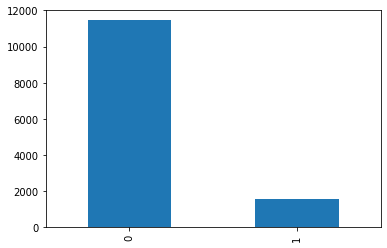

In [16]:
df['final_result'].value_counts().plot(kind='bar')

### Drop missing values

In [17]:
print(df.shape)
df = df.dropna()
df.shape

(13034, 19)


(13034, 19)

### Split training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'final_result']
y = df.loc[:, df.columns == 'final_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

df.head()

,final_result,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sex,Age Category_0,Age Category_1,Age Category_2,BMI Category_0,BMI Category_1,BMI Category_2,BMI Category_3
eid,,,,,,,,,,,,,,,,,,,
1000011,0,-0.000460,9.130000e-05,0.000111,-0.000023,0.000104,0.001784,0.000110,-0.001241,-0.003532,0.000406,0,0,1,0,0,0,1,0
1001244,0,-0.000431,-3.440000e-05,-0.000792,0.000533,0.001861,-0.000710,0.002938,-0.001525,0.001573,0.000330,1,0,0,1,0,1,0,0
1001283,0,-0.000110,9.970000e-07,0.000362,-0.000072,0.000906,0.000183,0.000510,0.001085,-0.001360,0.001036,1,0,0,1,0,0,0,1
1001505,0,-0.000268,-7.100000e-05,-0.000457,0.000318,0.000469,-0.000122,-0.000798,0.001494,0.000688,0.000965,1,0,1,0,0,0,1,0
1001772,0,-0.000470,7.472130e-04,-0.000736,0.000352,0.000942,-0.002007,0.001409,0.000369,0.001630,-0.000737,1,1,0,0,0,0,1,0


### Resampling data

In [21]:
from imblearn.over_sampling import SMOTE

columns = X_train.columns

os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['final_result'])


print("length of oversampled data is ",len(os_data_X))
print("Number of people not infected in oversampled data",len(os_data_y[os_data_y['final_result']==0]))
print("Number of infected patients",len(os_data_y[os_data_y['final_result']==1]))
print("Proportion of people not infected in oversampled data is ",len(os_data_y[os_data_y['final_result']==0])/len(os_data_X))
print("Proportion of infected patients in oversampled data is ",len(os_data_y[os_data_y['final_result']==1])/len(os_data_X))

Using TensorFlow backend.
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type

length of oversampled data is  17144
Number of people not infected in oversampled data 8572
Number of infected patients 8572
Proportion of people not infected in oversampled data is  0.5
Proportion of infected patients in oversampled data is  0.5


### Perform RFE to select features, keep 10 features for now

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False False False False  True  True
  True  True  True  True  True  True]
[1 3 1 8 9 4 7 5 2 6 1 1 1 1 1 1 1 1]


In [29]:
cols = X_train.columns[rfe.support_ == True]
cols

Index(['PC1', 'PC3', 'Sex', 'Age Category_0', 'Age Category_1',
       'Age Category_2', 'BMI Category_0', 'BMI Category_1', 'BMI Category_2',
       'BMI Category_3'],
      dtype='object')

### Get new training data

In [35]:
X_train = os_data_X
y_train = os_data_y['final_result']

In [40]:
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))

Accuracy of logistic regression classifier on test set: 0.66


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1984  896]
 [ 228  151]]
